# Subject
The subject of this notebook is to answer the main question, if the programming language Julia has entered the fight for the top language in Data Science.


In [1]:
#Enable Auto-Complete for jupyterlab
%config Completer.use_jedi = False

In [2]:
#Import all necessary libraries
import pandas as pd
import os
import matplotlib.ticker as mtick
import matplotlib.pyplot as plt


### Functions for Data Prepreration

In [3]:
def data_prep(df: pd.DataFrame, strYear: str) -> pd.DataFrame:
    '''This function is a summary of all data preprocessing steps
    '''
    col_to_keep=['LanguageWorkedWith','LanguageDesireNextYear']
    
    df= rename_col_if_exists(df,'HaveWorkedLanguage','LanguageWorkedWith')
    df= rename_col_if_exists(df,'WantWorkLanguage','LanguageDesireNextYear')
    df= rename_col_if_exists(df,'tech_do','LanguageWorkedWith')
    df= rename_col_if_exists(df,'tech_want','LanguageDesireNextYear')
    df= rename_col_if_exists(df,'occupation','DevType')
    df= add_year(df,strYear)
    df= classify_age(df)
    return df

def rename_col_if_exists(df: pd.DataFrame,searchCol: str,replaceCol: str) -> pd.DataFrame:
    if searchCol in df.columns:
        df.rename(columns={searchCol: replaceCol},inplace=True)
    return df

def classify_age(df: pd.DataFrame) -> pd.DataFrame:
    return df

def add_year (df: pd.DataFrame,strYear: str) -> pd.DataFrame:
    df['Year']=strYear
    return df


### Data Preperation

In [4]:
dir_data= '../data'

df= pd.DataFrame()

for file in os.listdir(dir_data):
    #Load csv file and prepare data with data_prep function
    temp_df= pd.read_csv(dir_data+'/'+file)
    temp_df = data_prep(temp_df, file[0:4])
    df = df.append(temp_df)
    
df.head()

/Users/thomaspietras/opt/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3165: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,Unnamed: 0,collector,country,un_subregion,so_region,age_range,age_midpoint,gender,self_identification,DevType,...,HoursOutside,SkipMeals,ErgonomicDevices,Exercise,SexualOrientation,EducationParents,RaceEthnicity,MilitaryUS,SurveyTooLong,SurveyEasy
0,1888.0,Facebook,Afghanistan,Southern Asia,Central Asia,20-24,22.0,Male,Programmer,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4637.0,Facebook,Afghanistan,Southern Asia,Central Asia,30-34,32.0,Male,Developer; Engineer; Programmer,Mobile developer - iOS,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,11164.0,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,21378.0,Facebook,Afghanistan,Southern Asia,Central Asia,NaN,NaN,Female,Engineer,DevOps,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,30280.0,Facebook,Afghanistan,Southern Asia,Central Asia,> 60,65.0,Prefer not to disclose,Developer; Engineer; Programmer; Sr. Developer...,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
#Create binary columns if smb. knows Julia,Python or if the person is working in a data related position
df['KnowsJulia']=df['LanguageWorkedWith'].str.contains('Julia',regex=False)
df['WantsJulia']=df['LanguageDesireNextYear'].str.contains('Julia',regex=False)
df['KnowsPython']=df['LanguageWorkedWith'].str.contains('Python',regex=False)
df['WantsPython']=df['LanguageDesireNextYear'].str.contains('Python',regex=False)
df['DataPerson']=df['DevType'].str.contains('data',regex=False)
df['DataPerson']=df['DataPerson'].fillna(False)

In [6]:
df[~df.KnowsJulia.isna() & df.KnowsJulia].groupby(by=['Year','KnowsJulia'],dropna=False)['KnowsJulia'].count()

Year  KnowsJulia
2017  True          138
2018  True          430
2020  True          519
Name: KnowsJulia, dtype: int64

In [7]:
df_grp_kn_jul=df[~df.KnowsJulia.isna() & df.KnowsJulia].groupby(by=['Year','KnowsJulia'],dropna=False)['KnowsJulia'].count()/df.groupby(by=['Year'],dropna=False)['KnowsJulia'].count()
df_grp_kn_jul

Year  KnowsJulia
2017  True          0.003768
2018  True          0.005489
2020  True          0.009045
Name: KnowsJulia, dtype: float64

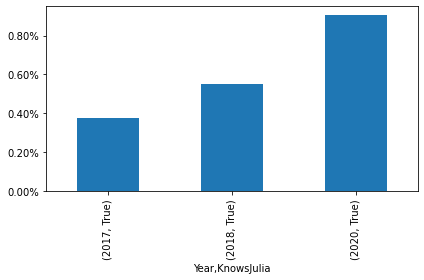

In [8]:
ax_kn_jul=df_grp_kn_jul.plot(kind='bar')
ax_kn_jul.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.tight_layout()
plt.savefig(fname='Pictures/KnowsJulia.png')

In [9]:
df[~df.WantsJulia.isna() & df.WantsJulia].groupby(by=['Year','WantsJulia'],dropna=False)['WantsJulia'].count()

Year  WantsJulia
2017  True           515
2018  True          1354
2020  True          1661
Name: WantsJulia, dtype: int64

In [10]:
df_grp_w_jul=df[~df.WantsJulia.isna() & df.WantsJulia].groupby(by=['Year','WantsJulia'],dropna=False)['WantsJulia'].count()/df.groupby(by=['Year'],dropna=False)['WantsJulia'].count()
df_grp_w_jul

Year  WantsJulia
2017  True          0.015250
2018  True          0.018486
2020  True          0.030695
Name: WantsJulia, dtype: float64

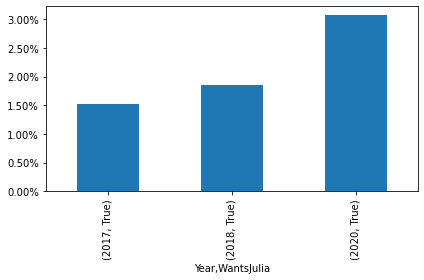

In [11]:
ax_w_jul=df_grp_w_jul.plot(kind='bar')
ax_w_jul.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.tight_layout()
plt.savefig(fname='Pictures/WantsJulia.png')

In [12]:
df_grp_kn_py=df[~df.KnowsPython.isna() & df.KnowsPython].groupby(by=['Year','KnowsPython'],dropna=False)['KnowsPython'].count()/df.groupby(by=['Year'],dropna=False)['KnowsPython'].count()
df_grp_kn_py

Year  KnowsPython
2016  True           0.250525
2017  True           0.319563
2018  True           0.387558
2019  True           0.416163
2020  True           0.440709
Name: KnowsPython, dtype: float64

In [13]:
df[~df.KnowsPython.isna() & df.KnowsPython].groupby(by=['Year','KnowsPython'],dropna=False)['KnowsPython'].count()

Year  KnowsPython
2016  True           12282
2017  True           11704
2018  True           30359
2019  True           36443
2020  True           25287
Name: KnowsPython, dtype: int64

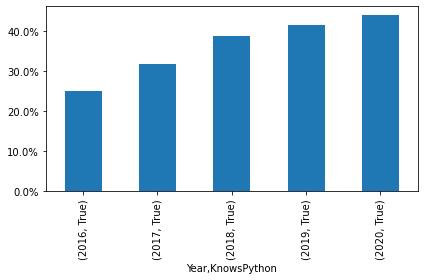

In [14]:
ax_kn_py=df_grp_kn_py.plot(kind='bar')
ax_kn_py.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.tight_layout()
plt.savefig(fname='Pictures/KnowsPy.png')

In [15]:
df_grp_w_py=df[~df.WantsPython.isna() & df.WantsPython].groupby(by=['Year','WantsPython'],dropna=False)['WantsPython'].count()/df.groupby(by=['Year'],dropna=False)['WantsPython'].count()
df_grp_w_py

Year  WantsPython
2016  True           0.281427
2017  True           0.372213
2018  True           0.447750
2019  True           0.475763
2020  True           0.493079
Name: WantsPython, dtype: float64

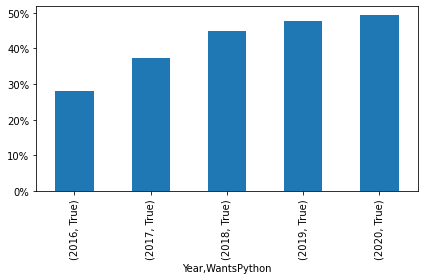

In [16]:
ax_w_py=df_grp_w_py.plot(kind='bar')
ax_w_py.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.tight_layout()
plt.savefig(fname='Pictures/WantsPy.png')

In [17]:
df[~df.KnowsJulia.isna() & df.KnowsJulia].groupby(by=['DataPerson','Year','KnowsJulia'],dropna=False)['KnowsJulia'].count()

DataPerson  Year  KnowsJulia
False       2017  True          138
            2018  True          430
            2020  True          435
True        2020  True           84
Name: KnowsJulia, dtype: int64

In [47]:
df20=df[df.Year=='2020']

In [48]:
df_grp_dp_knJul=df20[(~df20.KnowsJulia.isna()) & df20.KnowsJulia].groupby(by=['DataPerson','Year','KnowsJulia'],dropna=False)['KnowsJulia'].count()/df20[df20.Year=='2020'].groupby(by=['DataPerson','Year'],dropna=False)['KnowsJulia'].count()
df_grp_dp_knJul

DataPerson  Year  KnowsJulia
False       2020  True          0.008077
True        2020  True          0.023850
Name: KnowsJulia, dtype: float64

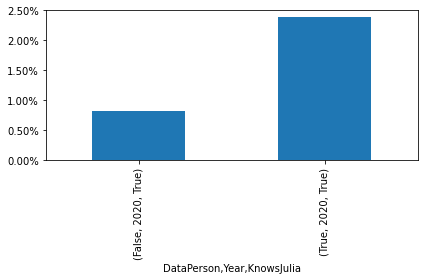

In [49]:
ax_k_py_dp=df_grp_dp_knJul.plot(kind='bar')
ax_k_py_dp.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.tight_layout()
plt.savefig(fname='Pictures/KnowsJulDataPerson.png')

In [46]:
df_grp_dp_wntJul=df20[(~df20.WantsJulia.isna()) & df20.WantsJulia].groupby(by=['DataPerson','Year','WantsJulia'],dropna=False)['WantsJulia'].count()/df20[df20.Year=='2020'].groupby(by=['DataPerson','Year'],dropna=False)['WantsJulia'].count()
df_grp_dp_wntJul

DataPerson  Year  WantsJulia
False       2020  True          0.028223
True        2020  True          0.068284
Name: WantsJulia, dtype: float64

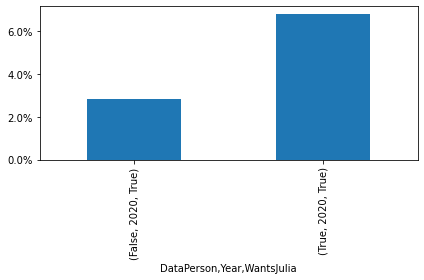

In [45]:
ax_w_py=df_grp_dp_wntJul.plot(kind='bar')
ax_w_py.yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1))
plt.tight_layout()
plt.savefig(fname='Pictures/WantsJulDataPerson.png')